In [1]:
from PIL import Image

In [2]:
import os
cwd = os.getcwd()

In [3]:
import numpy as np

In [4]:
im = np.array(Image.open("/home/aldo/Pictures/image processing.png"))

In [5]:
im.shape

(100, 100, 3)

In [6]:
data = np.asarray(im)

## Seminar tasks of week 2

In [7]:
# convolution

In [8]:
input = [0, 1, 2, 3, 4]
kernel = [2, 4, -1]

In [9]:
def pading(a,b):
    tmp =len(b)-1
    front = [0]* (tmp//2)
    back = [0]* (tmp- (tmp//2))
    return front + a + back

In [10]:
len(kernel)

3

In [11]:
padded = pading(input, kernel)

In [12]:
convolution=[]
for i in range (len(input)):
    sum = 0
    for j in range(len(kernel)):
        sum+=padded[i+j]*kernel[j]
    convolution+=[sum]

In [13]:
convolution

[-1, 2, 7, 12, 22]

In [14]:
a = np.array(input)
b = np.array(kernel)

In [15]:
np.multiply(a[0:3],b)

array([ 0,  4, -2])

In [16]:
np.sum(a)

10

In [17]:
g=[]
for i in range(len(a)-len(b)+1):
    tmp = np.multiply(a[i:i+len(b)],b)
    g+=[np.sum(tmp)]

In [18]:
g

[2, 7, 12]

In [19]:
a[0:3]*b

array([ 0,  4, -2])

In [20]:
# 2d now

In [21]:
# kernel2d= np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
kernel2d= np.array([[1.,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])/256

In [22]:
kernel2d

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.0234375 ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]])

In [23]:
def pading2d(big,kernel):
    tmpWidth=len(kernel[0])
    tmpHeight=len(kernel)
    z = np.zeros((len(big), tmpWidth-1), dtype=big.dtype)
    # aragshaa zalgah
    big = np.concatenate((big,z), axis=1)
    # dooshoo zalgah
    for i in range(tmpHeight-1):
        zz= np.zeros((1,len(big[0])), dtype=big.dtype)
        big = np.append(big,zz, axis=0)
    return big

In [24]:
r,g,b =data[:,:,0],data[:,:,1], data[:,:,2]
pr,pg,pb=pading2d(r,kernel2d),pading2d(g,kernel2d),pading2d(b,kernel2d)
height = len(kernel2d)
width = len(kernel2d[0])
blurredr= np.copy(r)
blurredg= np.copy(g)
blurredb= np.copy(b)
# r.setflags(write=1)
for i in range(len(pr)-height+1):
    for j in range(len(pr[0])-width+1):
        blurredr[i][j]=\
            np.sum(pr[i:i+height, j:j+width]*kernel2d)
        blurredg[i][j]=\
            np.sum(pg[i:i+height, j:j+width]*kernel2d)
        blurredb[i][j]=\
            np.sum(pb[i:i+height, j:j+width]*kernel2d)

In [25]:
blurred=np.dstack((blurredr,blurredg,blurredb))

In [26]:
rgb = np.dstack((r,g,b))

In [27]:
blurred

array([[[151, 145, 150],
        [155, 147, 152],
        [155, 146, 151],
        ...,
        [101,  94,  99],
        [ 46,  43,  45],
        [  9,   8,   9]],

       [[158, 152, 156],
        [161, 154, 157],
        [160, 152, 155],
        ...,
        [101,  94,  99],
        [ 46,  43,  45],
        [  9,   8,   9]],

       [[158, 153, 155],
        [161, 154, 156],
        [160, 152, 155],
        ...,
        [101,  94,  98],
        [ 46,  43,  44],
        [  9,   8,   9]],

       ...,

       [[100,  83,  73],
        [101,  83,  73],
        [101,  84,  73],
        ...,
        [ 70,  56,  43],
        [ 31,  25,  19],
        [  6,   4,   3]],

       [[ 45,  38,  33],
        [ 45,  38,  33],
        [ 46,  38,  33],
        ...,
        [ 32,  25,  19],
        [ 14,  11,   8],
        [  2,   2,   1]],

       [[  9,   7,   6],
        [  9,   7,   6],
        [  9,   7,   6],
        ...,
        [  6,   5,   3],
        [  2,   2,   1],
        [  0,   0,   0]]

In [28]:
im = Image.fromarray(np.uint8(blurred))

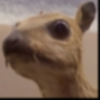

In [31]:
im

## Original

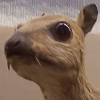

In [30]:
Image.fromarray(np.uint8(rgb))